In [ ]:
"""
`bonferroni` : one-step correction
`sidak` : one-step correction
`holm-sidak` : step down method using Sidak adjustments
`holm` : step-down method using Bonferroni adjustments
`simes-hochberg` : step-up method  (independent)
`hommel` : closed method based on Simes tests (non-negative)
`fdr_bh` : Benjamini/Hochberg  (non-negative)
`fdr_by` : Benjamini/Yekutieli (negative)
`fdr_tsbh` : two stage fdr correction (non-negative)
`fdr_tsbky` : two stage fdr correction (non-negative)
"""
# https://github.com/maximtrp/scikit-posthocs

In [ ]:
### Parametric pairwise multiple comparisons tests:
# Student T test.
# Scheffe test.
# Tamhane T2 test.
# TukeyHSD test.

### Non-parametric tests for factorial design:
# Wilcoxon test.
# Mann-Whitney test.
# Conover test.
# Dunn test.
# Dwass, Steel, Critchlow, and Fligner test.
# Nashimoto and Wright (NPM) test.
# Nemenyi test.
# van Waerden test.

### Non-parametric tests for block design:
# Conover test.
# Durbin and Conover test.
# Miller test.
# Nemenyi test.
# Quade test.
# Siegel test.
# sp.posthoc_conover(df, val_col='Sepal.Width', group_col='Species', p_adjust = 'holm')


In [432]:
import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scikit_posthocs as sp
import scipy.stats as ss
import pandas as pd
import numpy as np
import seaborn as sns
import os, sys
import os

In [433]:
print("Current working dir : %s" % os.getcwd())

Current working dir : /Users/danilabobkov/---ExData---/Onco/__для статьи по инвазии/Conover


In [434]:
df = pd.read_csv('df.csv', sep = ';')

In [435]:
#df1 = pd.read_csv('df1.csv', sep = ';')

In [436]:
# delete first column
# df = df.drop('Unnamed: 0', 1)

df = df.drop('Unnamed: 0', axis=1)

In [437]:
df.head()

,name,zone,red_mean,green_mean,blue_mean,red_median,green_median,blue_median
0,NegativeControl,NegativeControl,0.037247,0.000758,0.057899,0.011765,0.0,0.019608
1,NegativeControl,NegativeControl,0.039981,0.001490,0.022209,0.015686,0.0,0.003922
2,NegativeControl,NegativeControl,0.043770,0.001709,0.025759,0.015686,0.0,0.003922
3,NegativeControl,NegativeControl,0.038619,0.000204,0.080818,0.023529,0.0,0.011765
4,NegativeControl,NegativeControl,0.046247,0.001424,0.097822,0.031373,0.0,0.015686


In [438]:
cols = df.columns.tolist()
cols

['name',
 'zone',
 'red_mean',
 'green_mean',
 'blue_mean',
 'red_median',
 'green_median',
 'blue_median']

In [439]:
df.groupby('name', sort=False).aggregate({'green_mean' : 'mean'})

,green_mean
name,
NegativeControl,0.001116
Norma,0.029345
GAA,0.059888
SVE,0.067579
BSV,0.074973
YOI,0.081658
SAA,0.106008
SAA2,0.084688
SSF,0.090627


In [440]:
df.groupby('zone', sort=False).aggregate({'green_mean' : 'mean'})

,green_mean
zone,
NegativeControl,0.001116
Epilepsy,0.029345
GBM,0.081703


In [441]:
sp.posthoc_conover(df, val_col='green_mean', group_col='name', p_adjust = 'holm', sort=False)

,NegativeControl,Norma,GAA,SVE,BSV,YOI,SAA,SAA2,SSF,KAS,HTA,GNG,GEN,LAI
NegativeControl,1.000000e+00,1.000000e+00,0.000109,0.000004,0.000021,1.111852e-10,2.475911e-14,1.173637e-12,2.722726e-15,4.741413e-13,0.000001,4.245498e-08,2.916872e-09,2.614136e-10
Norma,1.000000e+00,1.000000e+00,0.251840,0.030232,0.034549,1.909122e-05,3.613739e-08,1.388557e-06,1.617035e-08,3.814340e-07,0.016104,2.004761e-03,2.066308e-04,2.442928e-05
GAA,1.092949e-04,2.518401e-01,1.000000,1.000000,1.000000,1.000000e+00,4.248165e-02,5.680159e-01,5.501690e-02,1.812648e-01,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
SVE,4.042425e-06,3.023173e-02,1.000000,1.000000,1.000000,1.000000e+00,3.619096e-01,1.000000e+00,5.199027e-01,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
BSV,2.059225e-05,3.454852e-02,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
YOI,1.111852e-10,1.909122e-05,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
SAA,2.475911e-14,3.613739e-08,0.042482,0.361910,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.434584,7.850539e-01,1.000000e+00,1.000000e+00
SAA2,1.173637e-12,1.388557e-06,0.568016,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
SSF,2.722726e-15,1.617035e-08,0.055017,0.519903,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.615289,1.000000e+00,1.000000e+00,1.000000e+00
KAS,4.741413e-13,3.814340e-07,0.181265,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00


In [442]:
# color variant 1 Greeny
#heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, #'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}

In [443]:
# color variant 2 Reddish good
cmap = ['1', '#fb6a4a',  '#08306b',  '#4292c6', '#c6dbef']
heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}

In [444]:
# color variant 3 Gray
#cmap = ['1', '#ffffff',  '#000000',  '#696969', '#c0c0c0']
#heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': True, 'square': #True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}

(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x28e5bef20>)

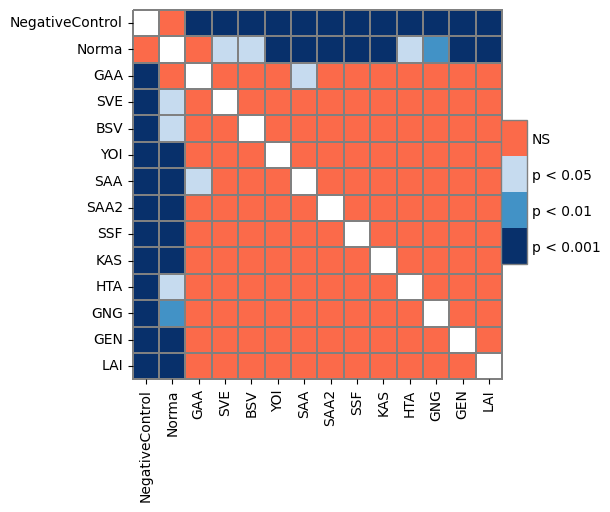

In [448]:
pc = sp.posthoc_conover(df, sort=False,
                            val_col='green_mean', 
                            group_col='name', 
                            p_adjust='holm')
sp.sign_plot(pc, **heatmap_args)

(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x28e4dfac0>)

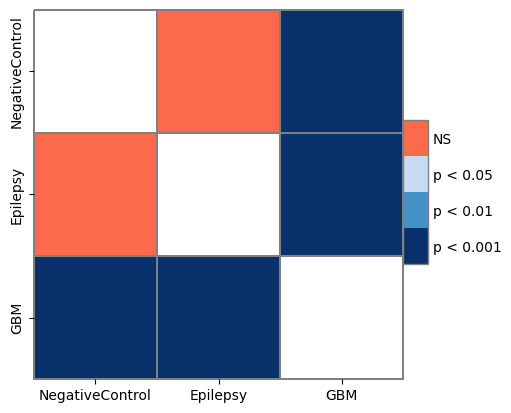

In [447]:
pc = sp.posthoc_conover(df, sort=False,
                            val_col='green_mean', 
                            group_col='zone', 
                            p_adjust='holm')
sp.sign_plot(pc, **heatmap_args)

In [313]:
data = [df.loc[ids, 'green_median'].values for ids in df.groupby('name').groups.values()]
H, p = ss.kruskal(*data)
p

1.078373026983733e-25

In [314]:
data = [df.loc[ids, 'red_median'].values for ids in df.groupby('name').groups.values()]
H, p = ss.kruskal(*data)
p

6.693960111266613e-35

In [315]:
lm = sfa.ols('green_median ~ C(zone)', data=df).fit()
anova = sa.stats.anova_lm(lm)
print(anova)

             df    sum_sq   mean_sq          F        PR(>F)
C(zone)     2.0  0.086692  0.043346  31.620835  1.331124e-13
Residual  465.0  0.637424  0.001371        NaN           NaN


(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x28e68dd20>)

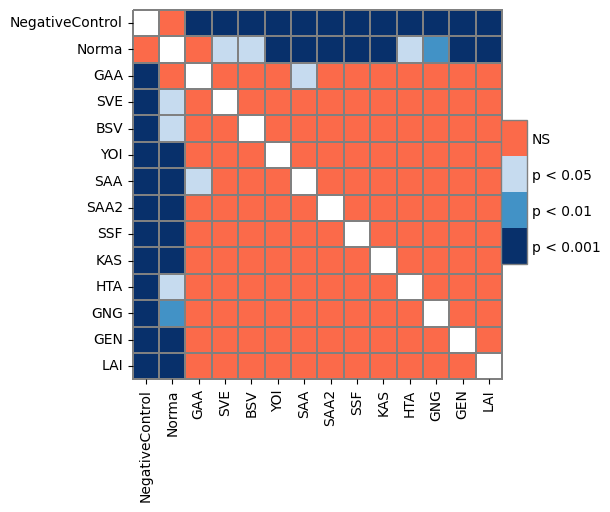

In [449]:
pc = sp.posthoc_conover(df, sort=False,
                            val_col='green_mean', 
                            group_col='name', 
                            p_adjust= 'Holm')
sp.sign_plot(pc, **heatmap_args)

(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x28e7706d0>)

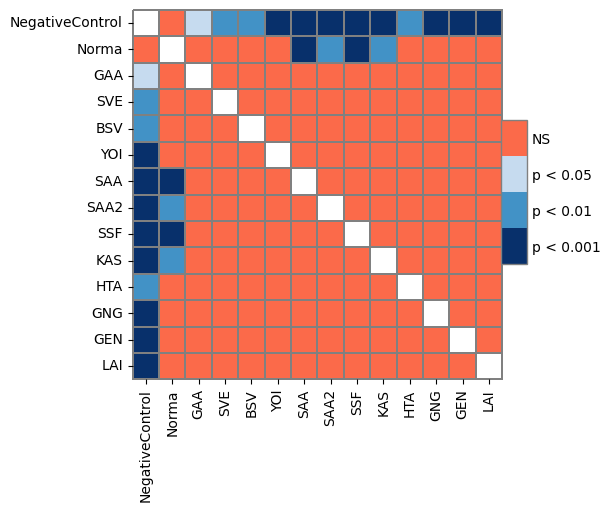

In [450]:
pc = sp.posthoc_scheffe(df, sort=False,
                            val_col='green_mean', 
                            group_col='name')
sp.sign_plot(pc, **heatmap_args)

(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x15002f490>)

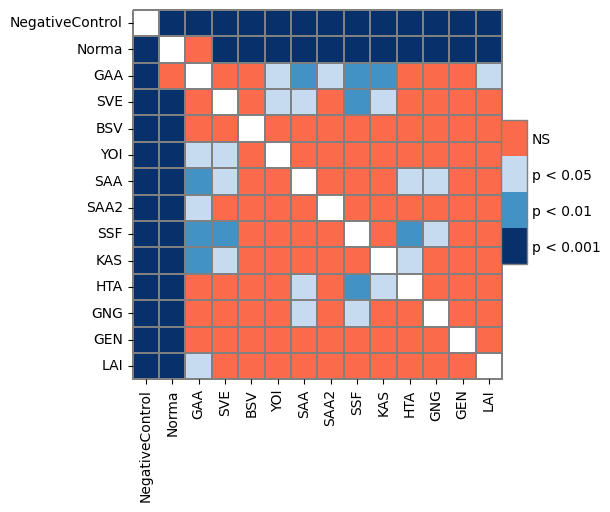

In [451]:
pc = sp.posthoc_mannwhitney(df, sort=False,
                            val_col='green_mean', 
                            group_col='name')
sp.sign_plot(pc, **heatmap_args)

(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x15010e4d0>)

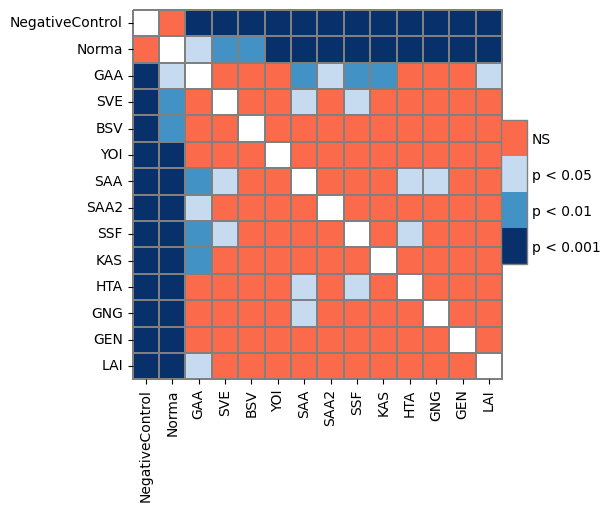

In [452]:
pc = sp.posthoc_conover(df, sort=False,
                            val_col='green_mean', 
                            group_col='name', 
                            p_adjust='fdr_bh')
sp.sign_plot(pc, **heatmap_args)

(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x1501ed240>)

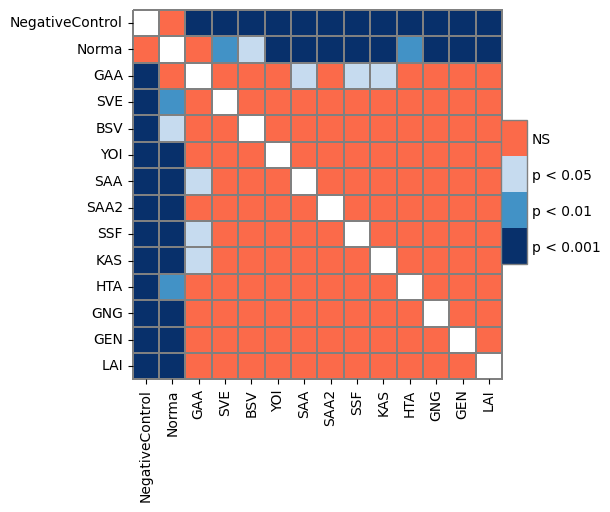

In [453]:
pc = sp.posthoc_conover(df, sort=False,
                            val_col='green_mean', 
                            group_col='name', 
                            p_adjust='fdr_by')
sp.sign_plot(pc, **heatmap_args)

(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x1502abf70>)

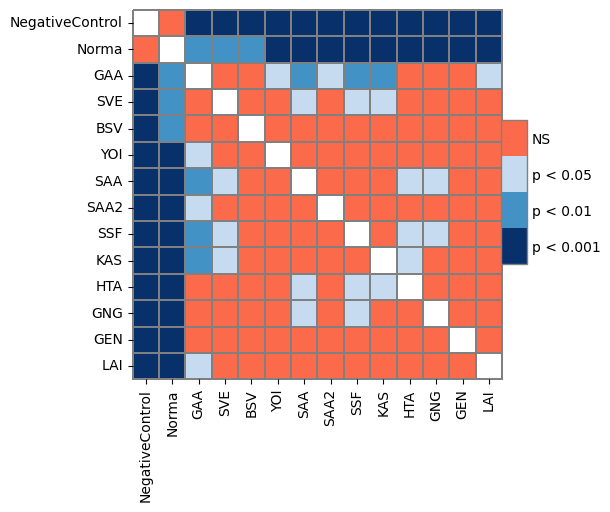

In [454]:
pc = sp.posthoc_conover(df, sort=False,
                            val_col='green_mean', 
                            group_col='name', 
                            p_adjust='fdr_tsbh')
sp.sign_plot(pc, **heatmap_args)

(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x28e2bb160>)

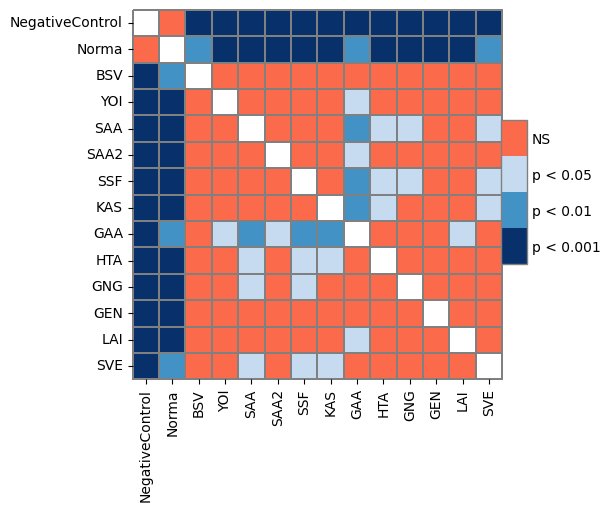

In [430]:
pc = sp.posthoc_conover(df, sort=False,
                            val_col='green_mean', 
                            group_col='name', 
                            p_adjust='fdr_tsbky')
sp.sign_plot(pc, **heatmap_args)

(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x28d2b7be0>)

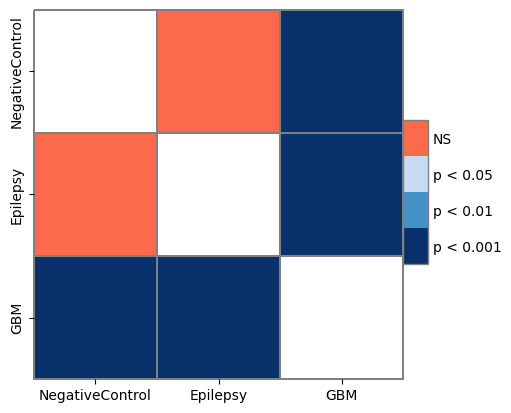

In [396]:
pc = sp.posthoc_conover(df, sort=False,
                            val_col='green_mean', 
                            group_col='zone', 
                            p_adjust='fdr_bh')
sp.sign_plot(pc, **heatmap_args)

In [ ]:
"""
`bonferroni` : one-step correction
`sidak` : one-step correction
`holm-sidak` : step down method using Sidak adjustments
`holm` : step-down method using Bonferroni adjustments
`simes-hochberg` : step-up method  (independent)
`hommel` : closed method based on Simes tests (non-negative)
`fdr_bh` : Benjamini/Hochberg  (non-negative)
`fdr_by` : Benjamini/Yekutieli (negative)
`fdr_tsbh` : two stage fdr correction (non-negative)
`fdr_tsbky` : two stage fdr correction (non-negative)
"""
# https://github.com/maximtrp/scikit-posthocs

### Parametric pairwise multiple comparisons tests:
# Student T test.
# Scheffe test.
# Tamhane T2 test.
# TukeyHSD test.

### Non-parametric tests for factorial design:
# Wilcoxon test.
# Mann-Whitney test.
# Conover test.
# Dunn test.
# Dwass, Steel, Critchlow, and Fligner test.
# Nashimoto and Wright (NPM) test.
# Nemenyi test.
# van Waerden test.

### Non-parametric tests for block design:
# Conover test.
# Durbin and Conover test.
# Miller test.
# Nemenyi test.
# Quade test.
# Siegel test.
# sp.posthoc_conover(df, val_col='Sepal.Width', group_col='Species', p_adjust = 'holm')